In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Cost - Error - Loss Functions

In machine learning, people talk about objective function, cost function, loss function.   
- Are they just different names of the same thing? 
- When to use them? 
- If they are not always refer to the same thing, what are the differences?



These are not very strict terms, and for sure - they are highly related. However, there are slight differences:

#### Loss Function 
Usually a function defined on a data point, your prediction and label, and measures the penalty. For example

- **Square loss** $l(f(x_i|\theta),y_i) = \left (f(x_i|\theta)-y_i \right )^2$ , used in **Linear regression**
- **Hinge loss** $l(f(x_i|\theta), y_i) = \max(0, 1-f(x_i|\theta)y_i)$, used in **SVM**
- **0/1 loss** $l(f(x_i|\theta), y_i) = 1 \iff f(x_i|\theta) \neq y_i$, used in theoretical analysis and definition of accuracy

#### Cost Function
Usually a big more general object, it might for example be a sum of loss functions over your training set plus some model complexity penalty (regularization). For example

- Mean Squared Error $MSE(\theta) = \frac{1}{N} \sum_{i=1}^N \left (f(x_i|\theta)-y_i \right )^2$
- SVM cost function $SVM(\theta) = \|\theta\|^2 + C \sum_{i=1}^N \xi_i$ (there are additional constraints connecting $\xi_i$ with $C$ and with training set)

#### Objective Function 
The most general term, which might by any function that you optimize during training, for example a probability of generating training set in maximum likelihood approach is a well defined objective function, but it is not a loss function nor cost function (however you could define an equivalent cost function). For example:

- MLE is a type of objective function (which you minimize)
- Divergence between classes can be an objective function (while it is barely a cost function, unless you define something artificial, like 1-Divergence, and name it a cost)

Loss function is a **part of a** cost function which is a **type of an** objective function


# 1. Cross Entropy

Consider classifying digits from [MNIST dataset](http://yann.lecun.com/exdb/mnist/), our label vector for the image of the number 4 based on one-hot encoding would be:  
y=[0,0,0,0,1,0,0,0,0,0]

And our output prediction vector could be something like  
y^ =[0.047,0.048,0.061,0.07,0.330,0.062,0.001,0.213,0.013,0.150].

We want our error to be proportional to how far apart these vectors are. To calculate this distance, we'll use the cross entropy. Then, our goal when training the network is to make our prediction vectors as close as possible to the label vectors by minimizing the cross entropy. The cross entropy calculation is shown below:

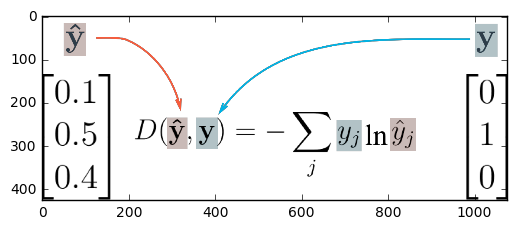

In [2]:
img=mpimg.imread("images/cross-entropy-diagram.png")
plt.imshow(img)

As you can see above, the cross entropy is the sum of the label elements times the natural log of the prediction probabilities. Note that this formula is not symmetric! Flipping the vectors is a bad idea because the label vector has a lot of zeros and taking the log of zero will cause an error.

What's cool about using one-hot encoding for the label vector is that $y_j$ is 0 except for the one true class. Then, all terms in that sum except for where $y_j=1$ are zero and the cross entropy is simply $D=−ln \hat{y}$ for the true label. For example, if your input image is of the digit 4 and it's labeled 4, then only the output of the unit corresponding to 4 matters in the cross entropy cost.

In [3]:
y =  np.array([0, 0, 0, 1, 0])
y_out =  np.array([0.27, 0.11, 0.33, 0.10, 0.19])
entropy = 0.0
if len(y) == len(y_out):
    for j in range(len(y)):
        entropy += y[j] * np.log(y_out[j])
entropy = - entropy

In [4]:
entropy


2.3025850929940455

# MSE

$$MSE(\theta) = \frac{1}{N} \sum_{i=1}^N \left (f(x_i|\theta)-y_i \right )^2$$

# Zero Means and Equal Variance

In [ ]:
pixel_i = pixel_i - 128 / 128